In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from stratification_functions import get_model_folders, regrid_models

base_dir = "/Volumes/Thalassa/CMIP6_SHDR/"

selected_models=get_model_folders(base_dir, year=1990)
regrid_data=regrid_models(base_dir, selected_models)


Processing model: FGOALS-f3-L
Processing model: CanESM5
Processing model: EC-Earth3-Veg
Processing model: EC-Earth
Processing model: CMCC-CM2
Processing model: E3SM-1-1-ECA
Processing model: UKESM1-1
Processing model: SAM0-UNICON
Processing model: NESM3
Processing model: ACCESS-CM2
Processing model: MRI-ESM2
Processing model: MPI-ESM2
Processing model: FIO-ESM2
Processing model: E3SM-1-0
Processing model: CAMS-CSM1
Processing model: BCC-ESM1


In [2]:
regrid_cora=regrid_models("/Volumes/Thalassa/",["CORA_SHDR"])
CORA=regrid_cora['CORA_SHDR'].sortby('time')

Processing model: CORA_SHDR


In [3]:
CORA_mld_mean=CORA.shdr.sel(param='D1').groupby('time.month').mean('time')
CORA_b3_mean=CORA.shdr.sel(param='b3').groupby('time.month').mean('time')
    

In [7]:
regrid_data

KeyError: 0

In [9]:

models_b3_mean=([])
models_mld_mean=([])
#models_mld_std=([])

for m in regrid_data:
    #print(m)
    m=regrid_data[m]
    #max_climb3=calculate_climatological_maximum_b3(m.sel(param='D1').shdr, m.sel(param='b3').shdr)
    models_mld_mean.append(m.shdr.sel(param='D1').groupby('time.month').mean('time'))
    models_b3_mean.append(m.shdr.sel(param='b3').groupby('time.month').mean('time'))

models_mld_mean=xr.concat(models_mld_mean, dim='model').mean('model')
models_b3_mean=xr.concat(models_b3_mean, dim='model').mean('model')
models_mld_std=xr.concat(models_mld_mean, dim='model').std('model')
models_b3_std=xr.concat(models_b3_mean, dim='model').std('model')



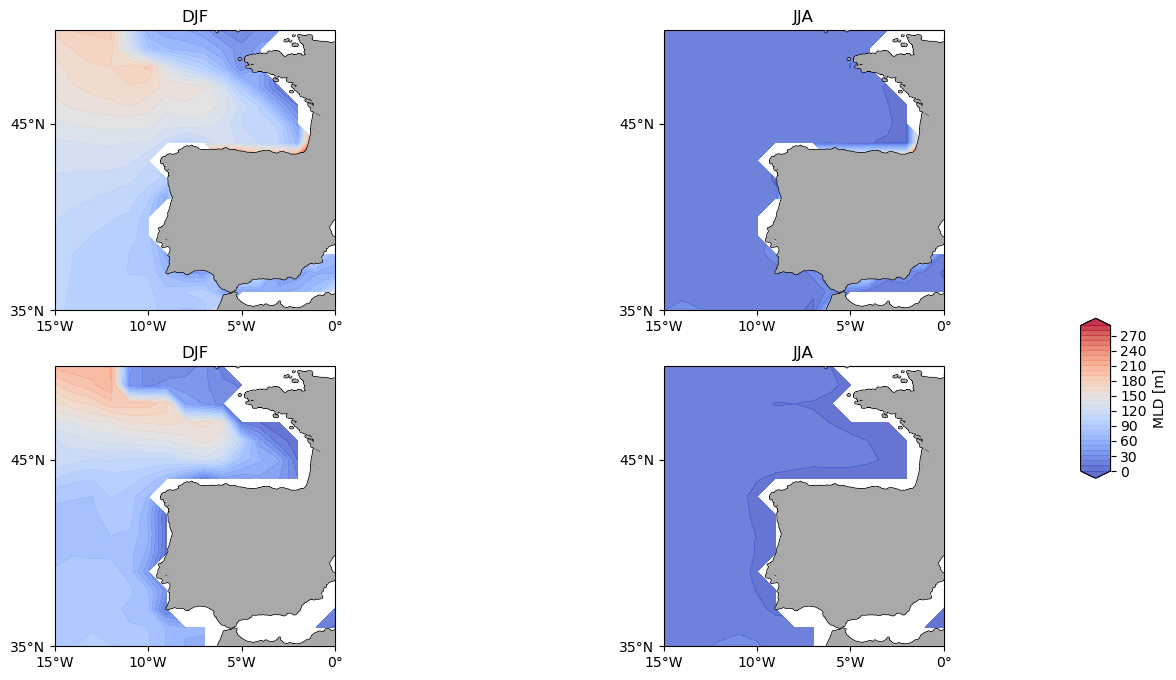

In [17]:
import matplotlib.gridspec as gridspec
import matplotlib.dates as md
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.ticker import FixedLocator
from cartopy.util import add_cyclic_point

def xr_add_cyclic_point(da):
    """
    Inputs
    da: xr.DataArray with dimensions (time,lat,lon)
    """

    # Use add_cyclic_point to interpolate input data
    lon_idx = da.dims.index('lon')
    wrap_data, wrap_lon = add_cyclic_point(da.values, coord=da.lon, axis=1)

    # Generate output DataArray with new data but same structure as input
    outp_da = xr.DataArray(data=wrap_data, 
                           coords = {'lat': da.lat, 'lon': wrap_lon}, 
                           dims=da.dims, 
                           attrs=da.attrs)
    
    return outp_da

seasons = ['DJF', 'JJA']
seasonsn = np.array([[0, 1, 11], [5, 6, 7]])

proj = ccrs.PlateCarree(central_longitude=0)

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1)

axes = []

for s in range(len(seasons)):
    ax = fig.add_subplot(gs[0,s], projection=proj)
    
    
    #ax.coastlines(zorder=99)
    #axes.append(ax)
    
    ax.add_feature(cfeature.LAND, facecolor='darkgrey', zorder=4)
    ax.add_feature(cfeature.COASTLINE, linewidth=2, zorder=2)
    ax.set_xticks(np.arange(-15, 5, 5), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(35,60, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_extent([-15, 0, 35, 50], crs=ccrs.PlateCarree())
    ax.set_title(seasons[s], loc='center')

    
    #grd = ax.gridlines(
    #draw_labels=True, 
    #xlocs=[], 
    #ylocs=[-20,0,20], 
    #color='k',alpha=0.5, linestyle='--')
    #grd.right_labels = None

    
    #grd.top_labels = None

    #
    #
    data = models_mld_mean.isel(month=seasonsn[s, :]).mean('month')

    #data=xr_add_cyclic_point(data)
    #data=xr_add_cyclic_point(data)
    #
    #data=data.isel(lon=slice(0,-1))
    #data=xr_add_cyclic_point(data)
    #data=data.isel(lon=slice(0,-1))
    #data.coords['lon']=(data.coords['lon'] ) % 360
    #data=data.sortby('lon')
    #data=xr_add_cyclic_point(data)
    
    #
    
    
    #data=xr_add_cyclic_point(data)
    #datas, lons = add_cyclic_point(data.values, coord=data.lon.values)
    
    c = ax.contourf(data.lon.values, data.lat.values, data, extend='both', alpha=.8, cmap='coolwarm', levels=np.arange(0, 300, 10), transform=ccrs.PlateCarree())
    
    ax = fig.add_subplot(gs[1,s], projection=proj)
    ax.add_feature(cfeature.LAND, facecolor='darkgrey', zorder=4)
    ax.add_feature(cfeature.COASTLINE, linewidth=2, zorder=2)
    ax.set_xticks(np.arange(-15, 5, 5), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(35,65, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_extent([-15, 0, 35, 50], crs=ccrs.PlateCarree())
    ax.set_title(seasons[s], loc='center')

    #
    #
    data = CORA_mld_mean.isel(month=seasonsn[s, :]).mean('month')


    
    #data=xr_add_cyclic_point(data)
    #data=xr_add_cyclic_point(data)
    #
    
    
    #
    
    
    #data=xr_add_cyclic_point(data)
    #datas, lons = add_cyclic_point(data.values, coord=data.lon.values)
    
    c = ax.contourf(data.lon.values, data.lat.values, data, extend='both', alpha=.8, cmap='coolwarm', levels=np.arange(0, 300, 10), transform=ccrs.PlateCarree())
    
    
    
# Add a single colorbar for all plots
cbar_ax = fig.add_axes([0.90, 0.32, 0.02, 0.20])
cbar = fig.colorbar(c, cax=cbar_ax, orientation='vertical', fraction=0.012, pad=0.02,aspect=10)
cbar.ax.set_ylabel('MLD [m]')

plt.show()

In [19]:
fig.savefig('/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/Radcan/map_MLD.png', dpi=300)

/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.

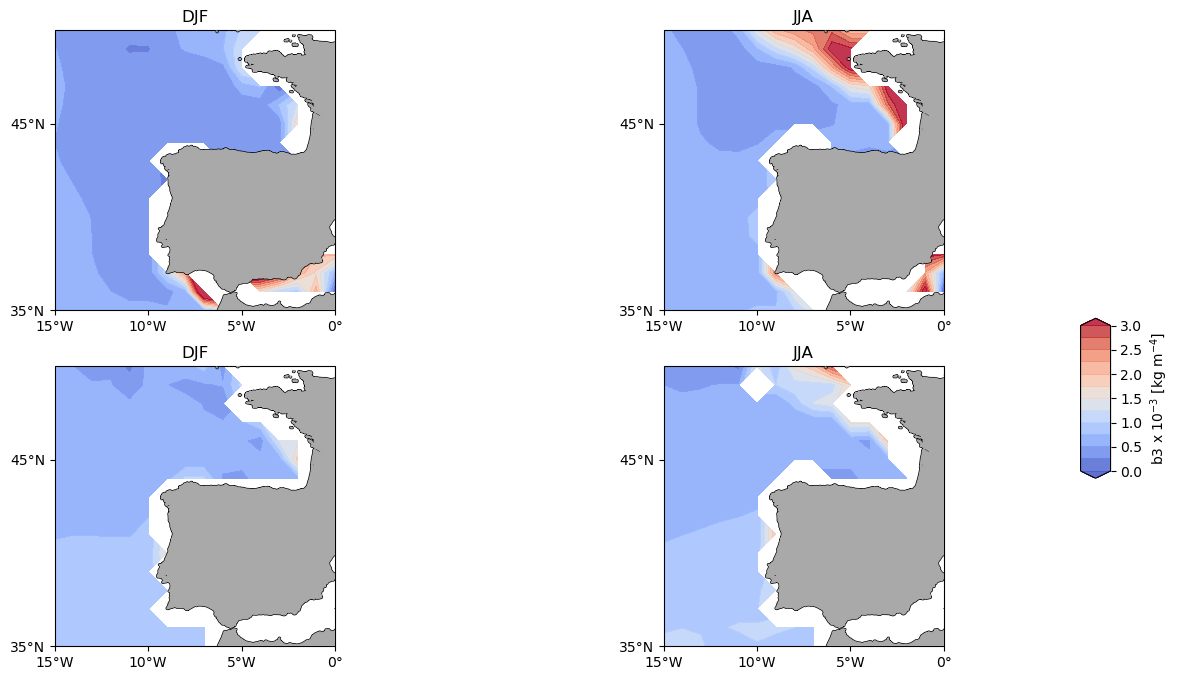

In [21]:
from scipy.ndimage import gaussian_filter

def detect_outliers(data, radius):
    mean_filtered = data.rolling(lat=2*radius+1, lon=2*radius+1, center=True, min_periods=1).median()
    std_filtered = data.rolling(lat=2*radius+1, lon=2*radius+1, center=True, min_periods=1).std()
    diff = np.abs(data - mean_filtered)
    outliers = diff > 2*std_filtered
    return outliers



# Interpolate to replace outliers
def interpolate_outliers(data, outliers, radius):
    data_corrected = data.copy()
    # Gaussian filter for smooth interpolation
    smoothed = gaussian_filter(data, sigma=radius, mode='nearest')
    data_corrected = xr.where(outliers, smoothed, data)
    return data_corrected

seasons = ['DJF', 'JJA']
seasonsn = np.array([[0, 1, 11], [5, 6, 7]])

proj = ccrs.PlateCarree(central_longitude=0, globe=None)

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1)

axes = []
for s in range(len(seasons)):
    ax = fig.add_subplot(gs[0,s], projection=proj)
    
    ax.add_feature(cfeature.LAND, facecolor='darkgrey', zorder=4)
    ax.add_feature(cfeature.COASTLINE, linewidth=2, zorder=2)
    ax.set_xticks(np.arange(-15, 5, 5), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(35,60, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_extent([-15, 0, 35, 50], crs=ccrs.PlateCarree())
    ax.set_title(seasons[s], loc='center')
    #
    #
    data = models_b3_mean#.isel(month=seasonsn[s, :]).mean('month')
    data=data.where(data<0.006,np.nan)
    data=data.isel(month=seasonsn[s, :]).mean('month')
    
    outliers = detect_outliers(data, 2)
    
    data_corrected = interpolate_outliers(data, outliers, 2)
    data=data_corrected
    #data=data.isel(lon=slice(1,-1))
    #data.coords['lon']=(data.coords['lon']+180)%360-180
    #data=data.sortby('lon')

    #data=xr_add_cyclic_point(data)
    #datas, lons = add_cyclic_point(data.values, coord=data.lon.values)
    
    
    
    c = ax.contourf(data.lon.values, data.lat.values, data.values*10**3, extend='both', alpha=.8, cmap='coolwarm', levels=np.arange(0, 3.25, 0.25), transform=ccrs.PlateCarree())
    
    ax = fig.add_subplot(gs[1,s], projection=proj)
    ax.add_feature(cfeature.LAND, facecolor='darkgrey', zorder=4)
    ax.add_feature(cfeature.COASTLINE, linewidth=2, zorder=2)
    ax.set_xticks(np.arange(-15, 5, 5), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(35,60, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_extent([-15, 0, 35, 50], crs=ccrs.PlateCarree())
    ax.set_title(seasons[s], loc='center')
    #
    #
    data = CORA_b3_mean#.isel(month=seasonsn[s, :]).mean('month')
    data=data.where(data<0.006,np.nan)
    data=data.isel(month=seasonsn[s, :]).mean('month')
    
    outliers = detect_outliers(data, 2)
    
    data_corrected = interpolate_outliers(data, outliers, 2)
    data=data_corrected
    #data=data.isel(lon=slice(1,-1))
    #data.coords['lon']=(data.coords['lon']+180)%360-180
    #data=data.sortby('lon')

    #data=xr_add_cyclic_point(data)
    #datas, lons = add_cyclic_point(data.values, coord=data.lon.values)
    
    
    
    c = ax.contourf(data.lon.values, data.lat.values, data.values*10**3, extend='both', alpha=.8, cmap='coolwarm', levels=np.arange(0, 3.25, 0.25), transform=ccrs.PlateCarree())
    
    
# Add a single colorbar for all plots
cbar_ax = fig.add_axes([0.90, 0.32, 0.02, 0.20])
cbar = fig.colorbar(c, cax=cbar_ax, orientation='vertical', fraction=0.012, pad=0.02,aspect=10)
cbar.ax.set_ylabel('b3 x 10$^{-3}$ [kg m$^{-4}$]')

plt.show()

In [22]:
fig.savefig('/Users/ignasi/Desktop/Oceanography/IEO/projects/stratification_CMIP6/Radcan/map_B3.png', dpi=300)

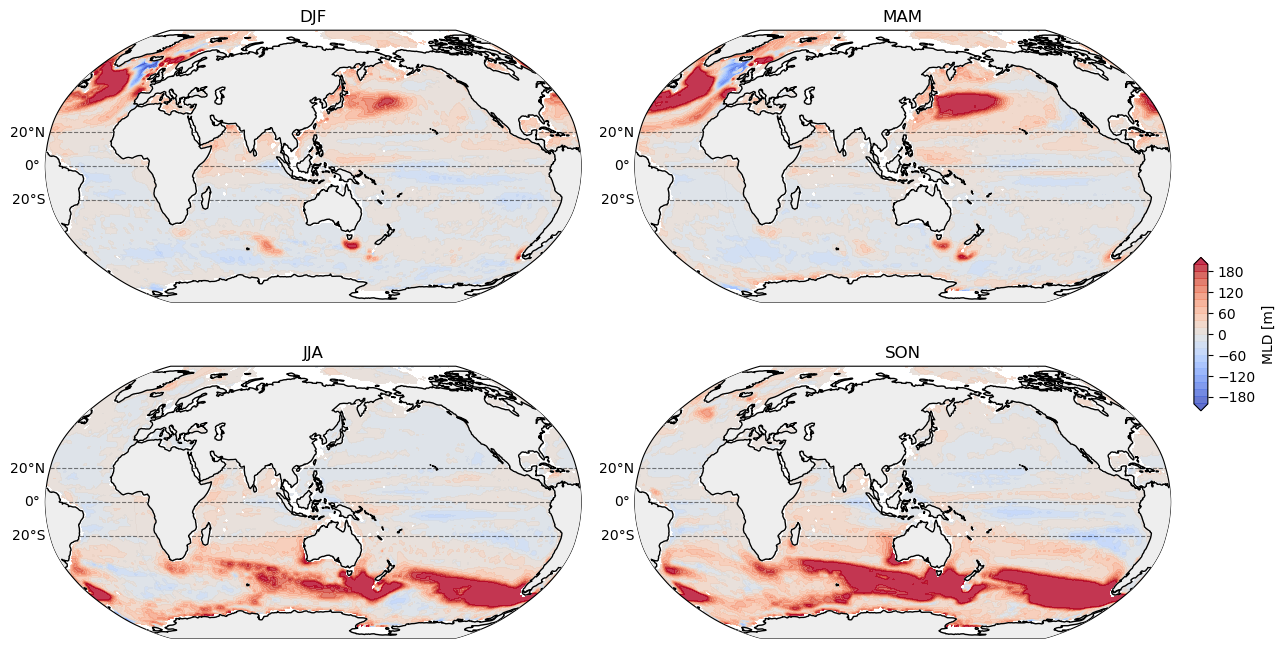

In [79]:
seasons = ['DJF', 'MAM','JJA','SON']
seasonsn = np.array([[0, 1, 11], [2,3,4],[5, 6, 7], [8,9,10]])

proj = ccrs.Robinson(central_longitude=120, globe=None)

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1)

axes = []
for s in range(len(seasons)):
    ax = fig.add_subplot(gs[s], projection=proj)
    ax.add_feature(cfeature.LAND, facecolor="#eeeeee", zorder=99)
    ax.coastlines(zorder=99)
    axes.append(ax)
    #ax.add_feature(cfeature.LAND, facecolor='darkgrey', zorder=4)
    #ax.add_feature(cfeature.COASTLINE, linewidth=2, zorder=2)
    ax.set_title(seasons[s], loc='center')
    grd = ax.gridlines(
    draw_labels=True, 
    xlocs=[], 
    ylocs=[-20,0,20], 
    color='k',alpha=0.5, linestyle='--')
    grd.right_labels = None

    grd.top_labels = None
    
    dataModel = models_mld_mean#.isel(month=seasonsn[s, :]).mean('month')
    #dataModel=dataModel.where(dataModel<0.006,np.nan)
    dataModel=dataModel.isel(month=seasonsn[s, :]).mean('month')
    
    #outliers = detect_outliers(dataModel, 2)
    
    #data_corrected = interpolate_outliers(dataModel, outliers, 2)
    #dataModel=data_corrected
    #data=data.isel(lon=slice(1,-1))
    #data.coords['lon']=(data.coords['lon']+180)%360-180
    #data=data.sortby('lon')
    dataModel=dataModel.isel(lon=slice(0,-1))
    dataModel=xr_add_cyclic_point(dataModel)
    dataModel=dataModel.isel(lon=slice(0,-1))
    dataModel.coords['lon']=(dataModel.coords['lon'] ) % 360
    dataModel=dataModel.sortby('lon')
    dataModel=xr_add_cyclic_point(dataModel)

    dataCora = CORA_mld_mean#.isel(month=seasonsn[s, :]).mean('month')
    #data=data.where(data<0.006,np.nan)
    dataCora=dataCora .isel(month=seasonsn[s, :]).mean('month')
    dataCora=dataCora .isel(lon=slice(0,-1))
    dataCora=xr_add_cyclic_point(dataCora )
    dataCora=dataCora .isel(lon=slice(0,-1))
    dataCora.coords['lon']=(dataCora .coords['lon'] ) % 360
    dataCora=dataCora .sortby('lon')
    dataCora=xr_add_cyclic_point(dataCora )
    
    dataBias=dataModel-dataCora 
    
    c = ax.contourf(dataBias.lon.values, dataBias.lat.values, dataBias.values, extend='both', alpha=.8, cmap='coolwarm', levels=np.arange(-200, 220, 20), transform=ccrs.PlateCarree())
    
# Add a single colorbar for all plots
cbar = fig.colorbar(c, ax=axes, orientation='vertical', fraction=0.012, pad=0.02,aspect=10)
cbar.ax.set_ylabel('MLD [m]')

plt.show()

In [77]:
fig.savefig('/Users/ignasi/Desktop/Oceanography/IEO/EOF2024/CORA_MLD_bias.png', dpi=300)

/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.

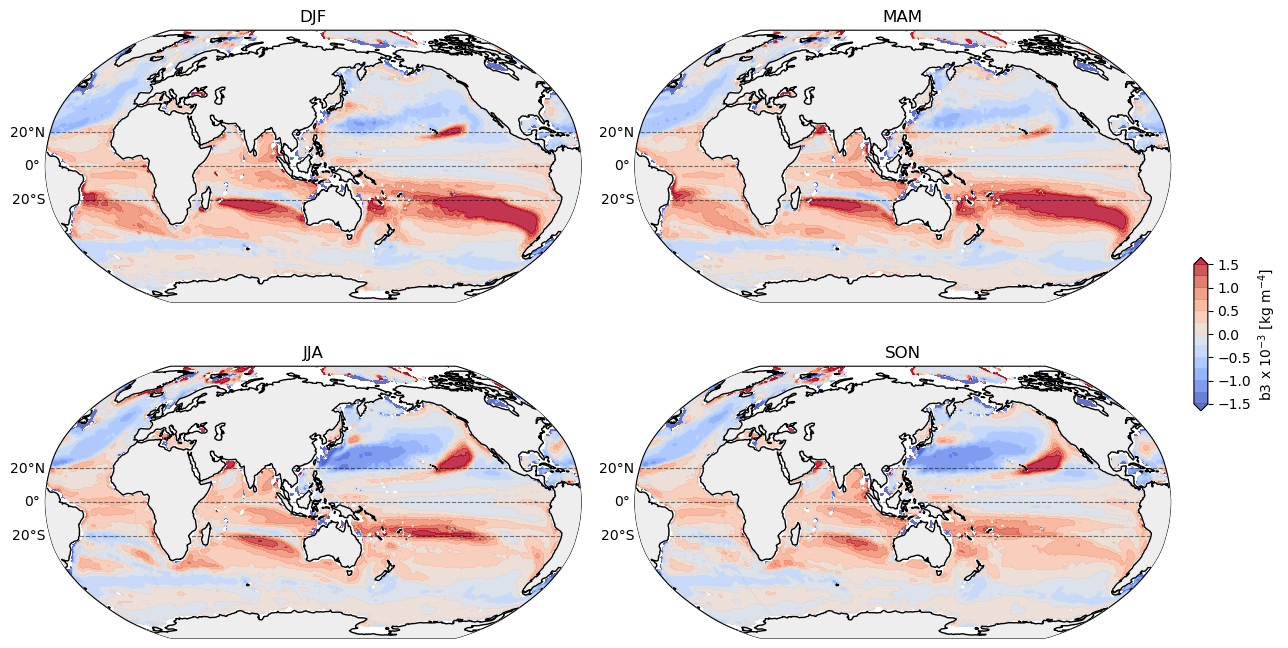

In [78]:
seasons = ['DJF', 'MAM','JJA','SON']
seasonsn = np.array([[0, 1, 11], [2,3,4],[5, 6, 7], [8,9,10]])

proj = ccrs.Robinson(central_longitude=120, globe=None)

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.1)

axes = []
for s in range(len(seasons)):
    ax = fig.add_subplot(gs[s], projection=proj)
    ax.add_feature(cfeature.LAND, facecolor="#eeeeee", zorder=99)
    ax.coastlines(zorder=99)
    axes.append(ax)
    #ax.add_feature(cfeature.LAND, facecolor='darkgrey', zorder=4)
    #ax.add_feature(cfeature.COASTLINE, linewidth=2, zorder=2)
    ax.set_title(seasons[s], loc='center')
    grd = ax.gridlines(
    draw_labels=True, 
    xlocs=[], 
    ylocs=[-20,0,20], 
    color='k',alpha=0.5, linestyle='--')
    grd.right_labels = None

    grd.top_labels = None
    
    dataModel = models_b3_mean#.isel(month=seasonsn[s, :]).mean('month')
    dataModel=dataModel.where(dataModel<0.006,np.nan)
    dataModel=dataModel.isel(month=seasonsn[s, :]).mean('month')
    
    outliers = detect_outliers(dataModel, 2)
    
    data_corrected = interpolate_outliers(dataModel, outliers, 2)
    dataModel=data_corrected
    #data=data.isel(lon=slice(1,-1))
    #data.coords['lon']=(data.coords['lon']+180)%360-180
    #data=data.sortby('lon')
    dataModel=dataModel.isel(lon=slice(0,-1))
    dataModel=xr_add_cyclic_point(dataModel)
    dataModel=dataModel.isel(lon=slice(0,-1))
    dataModel.coords['lon']=(dataModel.coords['lon'] ) % 360
    dataModel=dataModel.sortby('lon')
    dataModel=xr_add_cyclic_point(dataModel)

    dataArgo = CORA_b3_mean#.isel(month=seasonsn[s, :]).mean('month')
    #data=data.where(data<0.006,np.nan)
    dataArgo=dataArgo.isel(month=seasonsn[s, :]).mean('month')
    dataArgo=dataArgo.isel(lon=slice(0,-1))
    dataArgo=xr_add_cyclic_point(dataArgo)
    dataArgo=dataArgo.isel(lon=slice(0,-1))
    dataArgo.coords['lon']=(dataArgo.coords['lon'] ) % 360
    dataArgo=dataArgo.sortby('lon')
    dataArgo=xr_add_cyclic_point(dataArgo)
    
    dataBias=dataModel-dataArgo
    
    c = ax.contourf(dataBias.lon.values, dataBias.lat.values, dataBias.values*10**3, extend='both', alpha=.8, cmap='coolwarm', levels=np.arange(-1.5, 1.75, 0.25), transform=ccrs.PlateCarree())
    
# Add a single colorbar for all plots
cbar = fig.colorbar(c, ax=axes, orientation='vertical', fraction=0.012, pad=0.02,aspect=10)
cbar.ax.set_ylabel('b3 x 10$^{-3}$ [kg m$^{-4}$]')


plt.show()

fig.savefig('/Users/ignasi/Desktop/Oceanography/IEO/EOF2024/CORA_b3_bias.png', dpi=300)

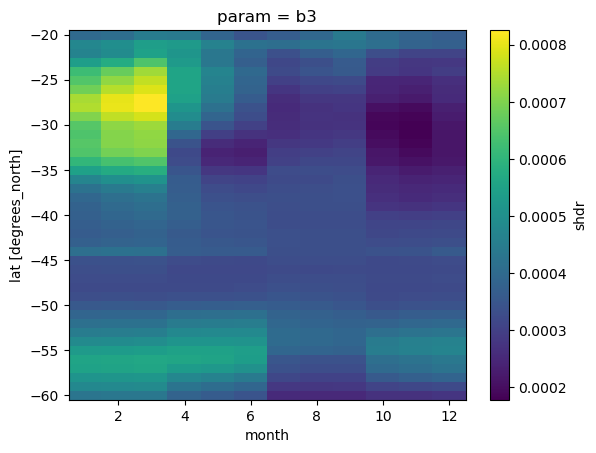

In [86]:
lon_lim=[-180,-80]
lat_lim=[-60,-20]

models_mld_pacific=models_mld_mean.sel(lon=slice(lon_lim[0],lon_lim[1]),lat=slice(lat_lim[0],lat_lim[1])).mean('lon')
models_b3_pacific=models_b3_mean.sel(lon=slice(lon_lim[0],lon_lim[1]),lat=slice(lat_lim[0],lat_lim[1])).mean('lon')

CORA_mld_pacific=CORA_mld_mean.sel(lon=slice(lon_lim[0],lon_lim[1]),lat=slice(lat_lim[0],lat_lim[1])).mean('lon')
CORA_b3_pacific=CORA_b3_mean.sel(lon=slice(lon_lim[0],lon_lim[1]),lat=slice(lat_lim[0],lat_lim[1])).mean('lon')


CORA_b3_pacific.T.plot()
#models_mld_pacific.T.plot()

pacific_bias_mld=models_mld_pacific-CORA_mld_pacific
pacific_bias_b3=models_b3_pacific-CORA_b3_pacific



[Text(0, 0, 'Feb'), Text(0, 0, 'May'), Text(0, 0, 'Aug'), Text(0, 0, 'Nov')]

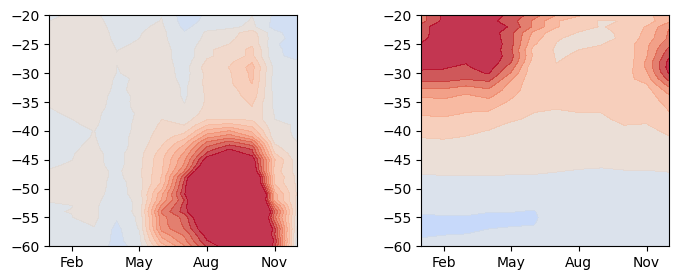

In [96]:
fig = plt.figure(figsize=(8, 3))
gs = gridspec.GridSpec(1, 2, figure=fig, wspace=0.5)

axes = []

ax = fig.add_subplot(gs[0])
ax.contourf(pacific_bias_mld.month,pacific_bias_mld.lat,pacific_bias_mld.T,extend='both', alpha=.8, cmap='coolwarm', levels=np.arange(-200, 220, 20))
ax.set_xticks([2,5,8,11])
ax.set_xticklabels(['Feb','May','Aug','Nov'])

ax = fig.add_subplot(gs[1])
ax.contourf(pacific_bias_b3.month,pacific_bias_b3.lat,pacific_bias_b3.T.values*10**3,extend='both', alpha=.8, cmap='coolwarm', levels=np.arange(-1.5, 1.75, 0.25))
ax.set_xticks([2,5,8,11])
ax.set_xticklabels(['Feb','May','Aug','Nov'])


In [97]:
fig.savefig('/Users/ignasi/Desktop/Oceanography/IEO/EOF2024/bias_pacific_timelat.png', dpi=300)

In [103]:
CORA_MLD=CORA.sel(param='D1').shdr.groupby('time.month').mean('time')
CORA_B3=CORA.sel(param='b3').shdr.groupby('time.month').mean('time')

cora_mld_nrm=CORA_MLD-CORA_MLD.mean('month')/CORA_MLD.std('month')
cora_b3_nrm=CORA_B3-CORA_B3.mean('month')/CORA_B3.std('month')

corr_map=xr.corr(cora_mld_nrm,cora_b3_nrm, dim='month')


/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/ignasi/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


[Text(0, 0, '-1'),
 Text(0, 0, '-0.5'),
 Text(0, 0, '0'),
 Text(0, 0, '0.5'),
 Text(0, 0, '1')]

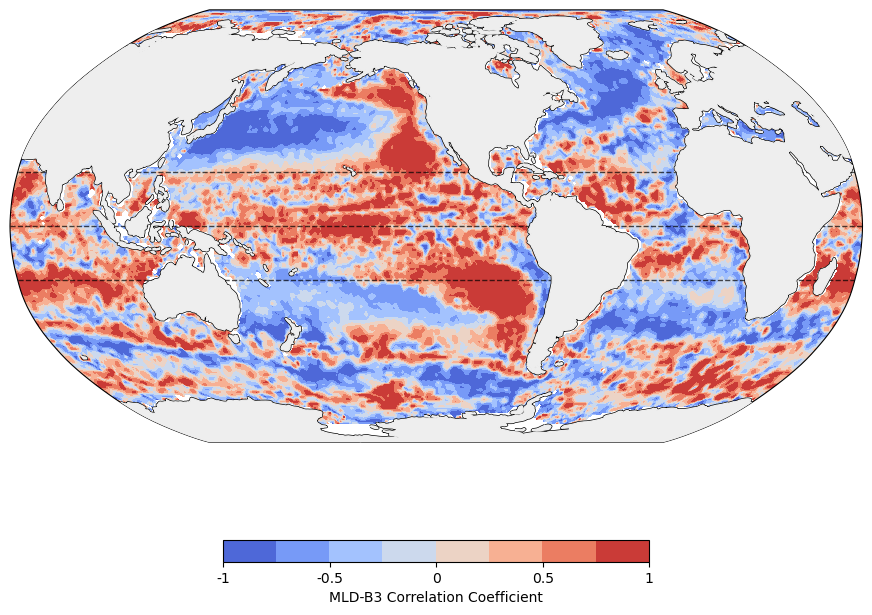

In [104]:
from cartopy.util import add_cyclic_point
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson(central_longitude=-120))

# Add cyclic point to data
data=corr_map
data, lons = add_cyclic_point(corr_map, coord=corr_map['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, corr_map['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm', levels=np.arange(-1,1.25,0.25))

# Add coastlines
ax.coastlines(linewidth=2, zorder=2)

ax.add_feature(cfeature.LAND, facecolor="#eeeeee", zorder=99)

# Add gridlines
grd = ax.gridlines(
draw_labels=True, 
xlocs=[], 
ylocs=[-20,0,20], 
color='k',alpha=0.7, linestyle='--', linewidth=1)

grd.xformatter = LongitudeFormatter()
grd.yformatter = LatitudeFormatter()
grd.right_labels = None
grd.top_labels = None
grd.ylabels_left = True

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.5,orientation='horizontal',label='MLD-B3 Correlation Coefficient')
cbar.ax.xaxis.set_ticks([-1,-0.5, 0,0.5, 1])#
cbar.ax.xaxis.set_ticklabels([-1,-0.5, 0,0.5, 1])

fig.savefig('/Users/ignasi/Desktop/Oceanography/IEO/EOF2024/correlation_CORA_map.png', dpi=300)


In [105]:
fig.savefig('/Users/ignasi/Desktop/Oceanography/IEO/EOF2024/correlation_CORA_map.png', dpi=300)


In [ ]:
import xarray as xr
import numpy as np
import cftime

# Example observational data
obs = regrid_cora['CORA_SHDR'].sortby('time')
import xarray as xr
import numpy as np
import pandas as pd

def cftime_to_numpy(cftime_obj):
    # Extract components from cftime object
    year = cftime_obj.year
    month = cftime_obj.month
    day = cftime_obj.day
    hour = cftime_obj.hour
    minute = cftime_obj.minute
    second = cftime_obj.second
    microsecond = cftime_obj.microsecond
    
    # Create a string representation and convert it to numpy.datetime64
    datetime_str = f"{year}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}:{second:02d}.{microsecond:06d}"
    return np.datetime64(datetime_str)


def calculate_rmse_for_model(model_ds, obs_ds, param):
    # Ensure model time is in numpy.datetime64 format
    model_time = model_ds.time.values
    
    # Check if the time is cftime and convert to numpy.datetime64 if needed
    if isinstance(model_time[0], cftime.DatetimeNoLeap):
        model_ds['time'] = [cftime_to_numpy(t) for t in model_ds['time'].values]
    
    # Get the time values for model and observation datasets
    model_time = model_ds.time.values
    obs_time = obs_ds.time.values
    
    # Extract year and month (YYYYMM) from both model and observation time
    model_ym = model_time.astype('datetime64[M]').astype(int)  # Year-Month as YYYYMM integer
    obs_ym = obs_time.astype('datetime64[M]').astype(int)
    
    # Find the common year-months (YYYYMM) between model and observation datasets
    common_ym = set(model_ym) & set(obs_ym)

    # Select data for matching times in the model and observation datasets
    model_subset = model_ds.sel(
        time=np.isin(model_ym, list(common_ym))
    )
    
    obs_subset = obs_ds.sel(
        time=np.isin(obs_ym, list(common_ym))
    )
    
    # Now we can calculate RMSE between the selected data
    # For simplicity, assuming the variable names in both datasets are the same and represent the parameter
    model_data = model_subset.sel(param=param).shdr.values
    obs_data = obs_subset.sel(param=param).shdr.values
    print(model_subset)
    
    # Calculate RMSE
    rmse = np.sqrt(np.nanmean((model_data - obs_data) ** 2))
    
    return rmse
 


calculate_rmse_for_model(regrid_data['CanESM5'])

In [48]:
regrid_data['CanESM5']

,Array,Chunk
Bytes,1.59 GiB,47.86 MiB
Shape,"(408, 8, 181, 361)","(12, 8, 181, 361)"
Count,172 Tasks,34 Chunks
Type,float64,numpy.ndarray


In [55]:
import numpy as np
import cftime
import xarray as xr

# Helper function to convert cftime.DatetimeNoLeap to numpy.datetime64
def calculate_rmse_for_model(model_ds, obs_ds, param):
    # Ensure model time is in numpy.datetime64 format
    model_time = model_ds.time.values
    
    # Check if the time is cftime and convert to numpy.datetime64 if needed
    if isinstance(model_time[0], cftime.DatetimeNoLeap):
        model_ds['time'] = [cftime_to_numpy(t) for t in model_ds['time'].values]
    
    # Get the time values for model and observation datasets
    model_time = model_ds.time.values
    obs_time = obs_ds.time.values
    
    # Extract year and month (YYYYMM) from both model and observation time
    model_ym = model_time.astype('datetime64[M]').astype(int)  # Year-Month as YYYYMM integer
    obs_ym = obs_time.astype('datetime64[M]').astype(int)
    
    # Find the common year-months (YYYYMM) between model and observation datasets
    common_ym = set(model_ym) & set(obs_ym)

    # Select data for matching times in the model and observation datasets
    model_subset = model_ds.sel(
        time=np.isin(model_ym, list(common_ym))
    )
    
    obs_subset = obs_ds.sel(
        time=np.isin(obs_ym, list(common_ym))
    )
    
    # Now we can calculate RMSE between the selected data
    # For simplicity, assuming the variable names in both datasets are the same and represent the parameter
    model_data = model_subset.sel(param=param).shdr.values
    obs_data = obs_subset.sel(param=param).shdr.values
    print(model_subset)
    
    # Calculate RMSE
    rmse = np.sqrt(np.nanmean((model_data - obs_data) ** 2))
    
    return rmse


In [56]:
#calculate_rmse_for_model(regrid_data['FGOALS-f3-L'], regrid_cora['CORA_SHDR'].sortby('time'), 'D1')




<xarray.Dataset>
Dimensions:  (time: 540, param: 8, lat: 181, lon: 361, lev: 23)
Coordinates:
  * lev      (lev) float64 5.0 15.0 25.0 35.0 ... 432.6 621.2 876.5 1.203e+03
  * time     (time) datetime64[ns] 1970-01-16T12:00:00 ... 2014-12-16T12:00:00
  * param    (param) object 'D1' 'b2' 'c2' 'b3' 'a2' 'a1' 'a3' 'em'
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 84 85 86 87 88 89 90
  * lon      (lon) int64 -180 -179 -178 -177 -176 -175 ... 176 177 178 179 180
Data variables:
    shdr     (time, param, lat, lon) float64 dask.array<chunksize=(60, 8, 181, 361), meta=np.ndarray>
Attributes:
    n_lev_ratio:    23/30
    hor_res:        100 km
    info_url:       https://furtherinfo.es-doc.org/CMIP6.CAS.FGOALS-f3-L.hist...
    regrid_method:  bilinear


60.68252975303208

In [41]:
rmse_results = {}

for model_name, model_ds in regrid_data.items():
    print(f"Processing model: {model_name}")
    print(model_ds.time.values)
    rmse_d1 = calculate_rmse_for_model(model_ds, obs, "D1")
    rmse_b3 = calculate_rmse_for_model(model_ds, obs, "b3")
    rmse_results[model_name] = {"D1": rmse_d1, "b3": rmse_b3}

# Output RMSE results
print(rmse_results)

Processing model: FGOALS-f3-L
[cftime.DatetimeNoLeap(1970, 1, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 2, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 3, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 4, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 5, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 6, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 7, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 8, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 9, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 10, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 11, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1970, 12, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1971, 1, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1971, 2, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime

TypeError: calculate_rmse_for_model() takes 1 positional argument but 3 were given

In [ ]:

    # Convert numpy datetime64 arrays to pandas DatetimeIndex for easier comparison
    model_time = pd.to_datetime(model_time)  
    obs_time = pd.to_datetime(obs_time)  

    # Create year-month pairs as tuples (year, month)
    model_ym = set(zip(model_time.year, model_time.month))
    obs_ym = set(zip(obs_time.year, obs_time.month))

    # Find common year-month pairs
    common_ym = model_ym & obs_ym
    if not common_ym:
        print("No matching times found!")
        return np.nan

    # Select data for matching times
    # Convert the year-month pair into pandas datetime for subsetting
    common_times = [pd.Timestamp(f"{year}-{month:02d}-01") for year, month in common_ym]

    # Select the model data for the common times
    model_subset = model_ds.sel(time=model_time.isin(common_times))
    obs_subset = obs_ds.sel(time=obs_time.isin(common_times))

    # Select parameter
    model_param = model_subset.sel(param=param)
    obs_param = obs_subset.sel(param=param)

    # Calculate RMSE
    rmse = np.sqrt(((model_param - obs_param) ** 2).mean().values)

    return rmse


In [35]:
regrid_data['CanESM5']

,Array,Chunk
Bytes,1.59 GiB,47.86 MiB
Shape,"(408, 8, 181, 361)","(12, 8, 181, 361)"
Count,172 Tasks,34 Chunks
Type,float64,numpy.ndarray


In [38]:
regrid_data

{'FGOALS-f3-L': <xarray.Dataset>
 Dimensions:  (time: 540, param: 8, lat: 181, lon: 361, lev: 23)
 Coordinates:
   * lev      (lev) float64 5.0 15.0 25.0 35.0 ... 432.6 621.2 876.5 1.203e+03
   * time     (time) object 1970-01-16 12:00:00 ... 2014-12-16 12:00:00
   * param    (param) object 'D1' 'b2' 'c2' 'b3' 'a2' 'a1' 'a3' 'em'
   * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 84 85 86 87 88 89 90
   * lon      (lon) int64 -180 -179 -178 -177 -176 -175 ... 176 177 178 179 180
 Data variables:
     shdr     (time, param, lat, lon) float64 dask.array<chunksize=(60, 8, 181, 361), meta=np.ndarray>
 Attributes:
     n_lev_ratio:    23/30
     hor_res:        100 km
     info_url:       https://furtherinfo.es-doc.org/CMIP6.CAS.FGOALS-f3-L.hist...
     regrid_method:  bilinear,
 'CanESM5': <xarray.Dataset>
 Dimensions:  (time: 408, param: 8, lat: 181, lon: 361, lev: 27)
 Coordinates:
   * lev      (lev) float64 3.047 9.454 16.36 ... 1.137e+03 1.298e+03 1.471e+03
   * time     (time)